In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm.notebook import tqdm
from datasets import load_dataset, Audio
from itertools import islice

Streaming examples:   0%|          | 0/10 [00:00<?, ?it/s]

Preprocessing examples:   0%|          | 0/10 [00:00<?, ?it/s]

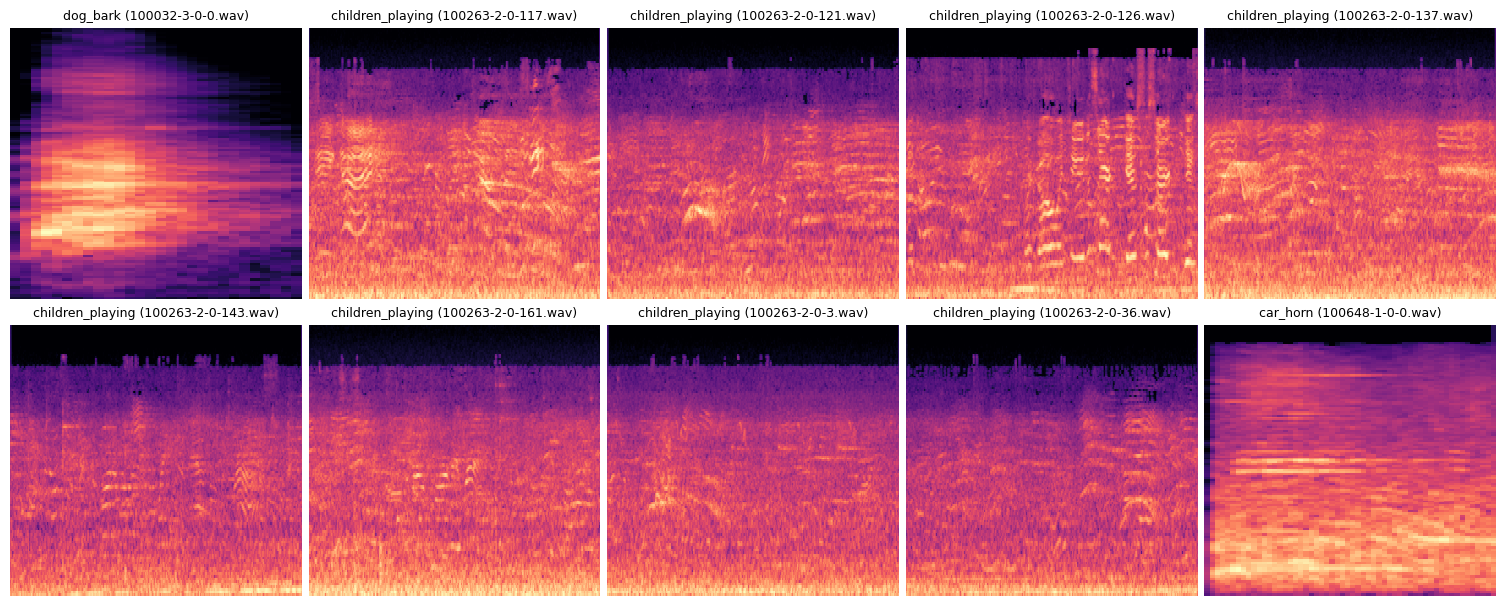

In [12]:
def preprocess_audio(audio, sr):
  # create mel spectrogram
  mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
  # convert to decibels
  mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
  # normalize mel spectrogram
  mel_spect_db_norm = (mel_spectrogram_db + 80) / 80

  return mel_spect_db_norm

# stream from Hugging Face
dataset = load_dataset("danavery/urbansound8k", split="train", streaming=True)
dataset = dataset.cast_column("audio", Audio())

# get four examples from the stream
num_examples = 10
stream_iter = iter(dataset. take(num_examples))
examples = []

# get the audio path from the streamed files
for example in tqdm(stream_iter,total=num_examples, desc="Streaming examples"):
  examples.append(example)

# preprocess the audio
processed_examples = []
for example in tqdm(examples, desc="Preprocessing examples"):
  audio = example["audio"]["array"]
  sr = example["audio"]["sampling_rate"]

  # preprocess the audio
  mel_example = preprocess_audio(audio, sr)
  processed_examples.append(mel_example)

# creating the grid to display the mel spectrograms
n = len(processed_examples) # displaying num_examples
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))

# plot the mel spectrogram
for ax, mel_example, ex in zip(axes.flat, processed_examples, examples):
  librosa.display.specshow(mel_example, sr=48000, x_axis="time", y_axis="mel", ax=ax)
  ax.axis("off")
  # set a title with class name and filename
  title = f"{ex['class']} ({ex['slice_file_name']})"
  ax.set_title(title, fontsize=9)  
  ax.axis("off")

plt.tight_layout(pad=0.5)
plt.savefig("urban-sounds-classification/spectrograms.png", bbox_inches="tight", pad_inches=0)
plt.show()